## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,adjusted_rand_score
from scipy.stats.contingency import crosstab
from scipy.special import binom
from sklearn.datasets import make_blobs

## Load the data

In [4]:
X,y=make_blobs(n_samples=1000,n_features=2,centers=4,cluster_std=1.5,random_state=42)

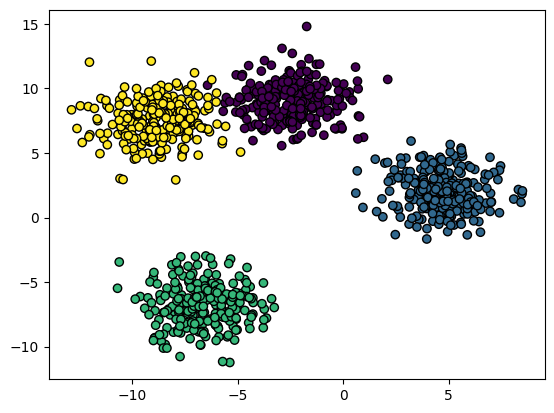

In [6]:
plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k')
plt.show()

## Custom KMeans function

In [12]:
class KMEANS():
    def __init__(self,n_cluster,n_iter=100):
        self.k=n_cluster
        self.n_iter=n_iter
        
    def random_init(self):
        idx=np.random.randint(0,(self.D).shape[0]-1,self.k)
        centroid=self.D[idx]
        return centroid

    def get_labels(self,data,cent):
        D=np.zeros((data.shape[0],cent.shape[0]))
        for i in range(cent.shape[0]):
            D[:,i]=np.sqrt(((data-cent[i])**2).sum(axis=1))
        return np.argmin(D,axis=1)

    def update_cent(self,labels):
        uniq=np.unique(labels)
        cent=np.zeros((uniq.shape[0],(self.init).shape[1]))
        for i in uniq:
            idx=np.where(labels==i)[0]
            cent[i]=self.D[idx].mean(axis=0)
        return cent

    def fit(self,data):
        self.D=data
        self.init=self.random_init()
        Centroid=self.init
        for i in range(self.n_iter):
            labels=self.get_labels(self.D,Centroid)
            Centroid=self.update_cent(labels)
        self.final_cent=Centroid
        
    def get_cent(self):
        return self.final_cent
        
    def predict(self,data):
        """
        Expects 2D array
        """
        return self.get_labels(data,self.final_cent)

## Define Some Metrics
* Adjusted Rand Index
* Silhouette Score

In [8]:
class Metrics:
    def ARI(tru_l,pred_l):
        """
        only works when we have ref
        """
        #Create contingency table first
        contingency=crosstab(tru_l,pred_l)[1]
        total_elem=np.sum(np.sum(contingency))
        nC2=binom(total_elem,2)
        nijC2=np.sum(np.sum(binom(contingency,2)))
        AiC2=np.sum(binom(np.sum(contingency,axis=1),2))
        BiC2=np.sum(binom(np.sum(contingency,axis=0),2))
        ARI=(nijC2-(AiC2*BiC2)*(1/nC2))/(0.5*(AiC2+BiC2)-(1/nC2)*(AiC2*BiC2))
        return ARI
        
    def Silhouette_score(data,labels):
        """
        Expects numpy array
        """
        uniq=np.unique(labels)
        S=[]
        for i in range(len(uniq)):
            idx=np.where(labels==uniq[i])[0]
            D=data[idx]
            for d in D:
                intra=np.sum(np.sqrt(np.sum((D-d)**2,axis=1)))/(D.shape[0]-1)
                inter=np.inf
                for j in range(len(uniq)):
                    if j!=i:
                        idx=np.where(labels==uniq[j])[0]
                        C=data[idx]
                        x=np.mean(np.sqrt(np.sum((C-d)**2,axis=1)))
                        inter=min(inter,x)
                S.append((inter-intra)/(max(inter,intra)))
        return np.mean(S)

In [59]:
k=KMEANS(n_cluster=4,n_iter=2000)

In [60]:
k.fit(X)

In [61]:
k.get_cent()

array([[-2.5206706 ,  9.03040298],
       [-6.67833886, -6.78022155],
       [ 4.66646824,  2.05385561],
       [-8.9067889 ,  7.4540808 ]])

In [62]:
l=k.predict(X)

In [70]:
S=Metrics#Custom metrics
print(f"Silhouette score is {S.Silhouette_score(X,l):.2f}")
print(f"Adjusted Rand index is {S.ARI(l,y):.2f}")

Silhouette score is 0.69
Adjusted Rand index is 0.99


## Sklearn KMeans

In [64]:
K=KMeans(n_clusters=4,n_init='auto')

In [65]:
K.fit(X)

KMeans(n_clusters=4, n_init='auto')

In [66]:
K.cluster_centers_

array([[-6.67833886, -6.78022155],
       [-8.88245787,  7.46585721],
       [ 4.66646824,  2.05385561],
       [-2.49390293,  9.0311932 ]])

In [72]:
print(f"Silhouette score is {silhouette_score(X,K.labels_):.2f}")
print(f"Adjusted Rand score is {adjusted_rand_score(K.labels_,y):.2f}")

Silhouette score is 0.69
Adjusted Rand score is 0.98
